### SPRINT1-UNDERSTANDING THE DATA

1.Import the required libraries


In [1]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense ,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

2.Loading the data

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


3.Analyzing the data


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

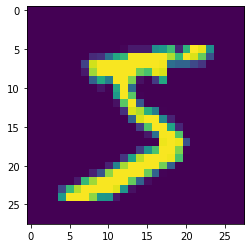

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

4.Reshaping the dataset

In [13]:
x_train=x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape(10000, 28, 28, 1).astype('float32')

5.One hot Encoding

In [8]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train, number_of_classes)
y_test=np_utils.to_categorical(y_test, number_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### SPRINT2-MODEL BUILDING

1.Add CNN Layers

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))


2.Compiling the model

In [11]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

3.Train the model

In [14]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.2613 - accuracy: 0.9523 - val_loss: 0.0924 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.0669 - accuracy: 0.9802 - val_loss: 0.0714 - val_accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.1121 - val_accuracy: 0.9702
Epoch 4/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0774 - val_accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0944 - val_accuracy: 0.9776


4.Observing the metics

In [15]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.09440457075834274, 0.9775999784469604]


5.Test the model

In [16]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 1s 503ms/step
[[6.39302014e-11 1.92686877e-19 6.10958750e-08 4.46125068e-06
  5.08821697e-19 2.58780797e-14 5.66186983e-19 9.99995470e-01
  9.95120999e-12 4.52038990e-10]
 [5.31988949e-13 2.69534097e-13 1.00000000e+00 2.39036747e-14
  5.06575230e-20 4.59198028e-22 1.59037870e-11 2.60662725e-23
  7.69959183e-13 4.27862457e-24]
 [5.10552134e-08 9.99419808e-01 1.03479006e-05 7.75968352e-12
  1.03664997e-05 3.92677890e-07 1.58789104e-09 3.52089885e-11
  5.59113978e-04 1.09291005e-11]
 [1.00000000e+00 5.53433434e-16 4.46223137e-12 2.54150012e-15
  3.18195550e-14 3.07361664e-10 7.02960912e-10 2.14802486e-16
  2.28522984e-13 7.06658430e-12]]


In [17]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


6.Observing the metics

In [18]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.09440457075834274, 0.9775999784469604]


7.Test the model

In [19]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 23ms/step
[[6.39302014e-11 1.92686877e-19 6.10958750e-08 4.46125068e-06
  5.08821697e-19 2.58780797e-14 5.66186983e-19 9.99995470e-01
  9.95120999e-12 4.52038990e-10]
 [5.31988949e-13 2.69534097e-13 1.00000000e+00 2.39036747e-14
  5.06575230e-20 4.59198028e-22 1.59037870e-11 2.60662725e-23
  7.69959183e-13 4.27862457e-24]
 [5.10552134e-08 9.99419808e-01 1.03479006e-05 7.75968352e-12
  1.03664997e-05 3.92677890e-07 1.58789104e-09 3.52089885e-11
  5.59113978e-04 1.09291005e-11]
 [1.00000000e+00 5.53433434e-16 4.46223137e-12 2.54150012e-15
  3.18195550e-14 3.07361664e-10 7.02960912e-10 2.14802486e-16
  2.28522984e-13 7.06658430e-12]]


In [20]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


8.Save the model

In [21]:
model.save('models/mnistCNN.h5')

9.Test with saved model

Testing-1

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model=load_model('/content/models/mnistCNN.h5')
img=image.load_img('/content/data.jpg',target_size=(28,28),grayscale=True)
img=image.img_to_array(img)
print(img.shape)
x=np.expand_dims(img,axis=0)
print(x.shape)
print('*'*20)
print(model.predict(x))
print('*'*20)
print(np.round_(model.predict(x)))


(28, 28, 1)
(1, 28, 28, 1)
********************
1/1 [==============================] - 0s 58ms/step
[[3.7480348e-03 7.6842160e-10 3.1971972e-06 1.1066861e-03 8.1795186e-04
  2.6664600e-01 3.0438601e-05 1.0285763e-02 5.6085092e-01 1.5651101e-01]]
********************
1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Testing-2

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model=load_model('/content/models/mnistCNN.h5')
img=image.load_img('/content/0.png',target_size=(28,28),grayscale=True)
img=image.img_to_array(img)
print(img.shape)
x=np.expand_dims(img,axis=0)
print(x.shape)
print('*'*20)
print(model.predict(x))
print('*'*20)
print(np.round_(model.predict(x)))

(28, 28, 1)
(1, 28, 28, 1)
********************
1/1 [==============================] - 0s 58ms/step
[[8.4565616e-01 6.1223082e-06 1.3529530e-01 7.2525195e-06 7.0594538e-06
  7.8179939e-03 6.0109678e-06 1.0849683e-02 1.4368325e-06 3.5300280e-04]]
********************
1/1 [==============================] - 0s 34ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Testing-3

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model=load_model('/content/models/mnistCNN.h5')
img=image.load_img('/content/5.png',target_size=(28,28),grayscale=True)
img=image.img_to_array(img)
print(img.shape)
x=np.expand_dims(img,axis=0)
print(x.shape)
print('*'*20)
print(model.predict(x))
print('*'*20)
print(np.round_(model.predict(x)))

(28, 28, 1)
(1, 28, 28, 1)
********************
1/1 [==============================] - 0s 60ms/step
[[1.00980415e-05 1.88434527e-07 6.88326254e-05 1.65369492e-02
  6.14392848e-05 9.82516408e-01 3.10022413e-04 2.06910133e-08
  4.71084146e-04 2.49948462e-05]]
********************
1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
